# <center>Prediction using Supervised ML</center>

# Importing modules

In [11]:
import pandas as pd
import numpy as np


# Downloading DATA-set

In [4]:
!wget -O marks.csv http://bit.ly/w-data

--2021-06-15 14:42:52--  http://bit.ly/w-data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores - student_scores.csv [following]
--2021-06-15 14:42:53--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: 'marks.csv'

     0K                                                       100% 7.52M=0s

2021-06-15 14:43:00 (7.52 MB/s) - 'marks.csv' saved [212/212]



In [5]:
df = pd.read_csv("marks.csv")
# take a look at the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# summarize the data
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [34]:
#Visual representation

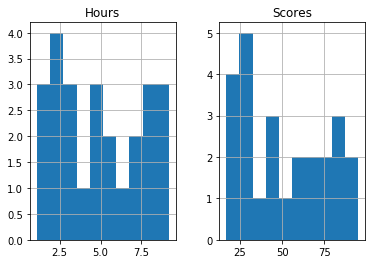

In [12]:
import matplotlib.pyplot as plt
viz = df[['Hours','Scores']]
viz.hist()
plt.show()

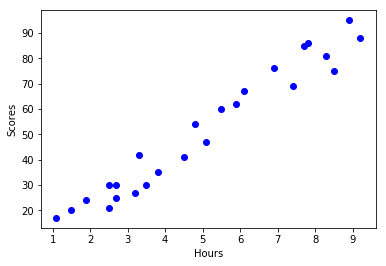

In [13]:
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [35]:
#### Creating train and test dataset

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

# Modeling
Using sklearn package to model data.

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.34472465]]
Intercept:  [4.90663922]


# Plot outputs
we can plot the fit line over the data:

Text(0, 0.5, 'SCORES')

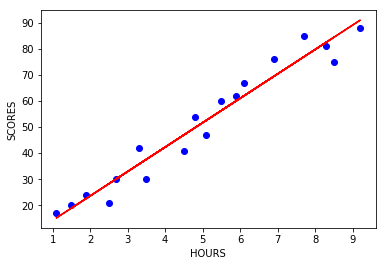

In [19]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("HOURS")
plt.ylabel("SCORES")

In [20]:
#Evaluation / error checking
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 5.75
Residual sum of squares (MSE): 37.23
R2-score: 0.93


# predicted score if a student studies for 9.25 hrs/ day?

In [40]:
print("Score : %.2f" % regr.predict([[9.25]]))

Score : 91.35
